##  Heart Attack Analysis- EDA & Logistic Regression(85% accuracy)
Immaculate Ezeogbo, Cassidy Fitzpatrick, Hardeep Gill, Muhammad Junaid Saumtally, Xiaoxi Man, Yasser Khan

### A. INTRODUCTION

According to the [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/heartdisease/facts.htm), heart attack occurs approximately every 40 seconds in the United States, making it one of the leading causes of death
among patients. More than 805,000 Americans have a heart attack every year, and in most cases,
patients suffer from recurrent heart attacks. Therefore, it is important to understand the leading
factors in order to increase chances of proper diagnosis and treatments.

#### Load relevant libraries 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook
import statsmodels.api as sm
from statsmodels.formula.api import logit

# And some functions we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

### B. DATA PREPARATION

In [124]:
#Read data set
heart_df=pd.read_csv("../input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [125]:
#Let's look at the first 5 rows
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
#..and the last 5 rows
heart_df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [127]:
#Number of rows and columns in the dataset
heart_df.shape

(303, 14)

In [128]:
#Data summary statistics
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [129]:
#column names in the dataset
print(heart_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Data Pre-processing

First step was to identify and remove duplicate rows, as well as rows containing missing values. Additionally, the box and whisker
plots were used to detect outliers (values outside the range of -3δ and +3δ were subsequently removed)

In [130]:
#data types of the attributes
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Data Pre-processing -identify missing values

In [131]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data Pre-processing -identify and drop duplicate rows

In [132]:
heart_df.loc[heart_df.duplicated(keep=False), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [133]:
heart_df.drop_duplicates(inplace=True)

In [134]:
heart_df.shape

(302, 14)

#### Data Pre-processing- remove outliers using box and whisker plots in numerical_cols 

In [135]:
#Data Grouping
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

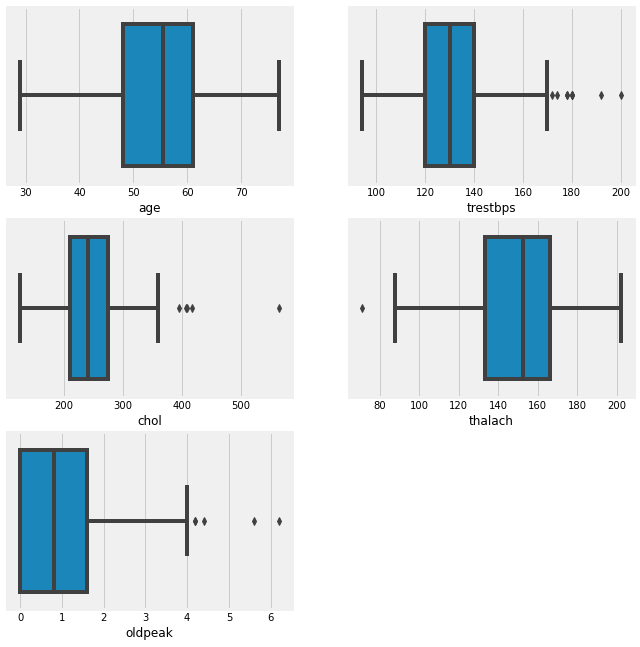

In [136]:
#Boxplots for all the numerical variables
plt.figure(figsize=(10,15))
for i in range(0,5):
  plt.subplot(4,2,i+1)
  sns.boxplot(heart_df[numerical_cols[i]])

As shown in the plots above, there are some outliers in 'trestbps', 'chol', 'thalach', and 'oldpeak'. The next step shows how these outliers were handled 

#### Data Pre-processing- remove rows with outliers outside the range of -3δ and +3δ

##### Remove Outliers from 'trestbps' variable

In [137]:
#Upper limit
upper_limit=heart_df.trestbps.mean() + 3*heart_df.trestbps.std()
upper_limit

184.29283169673522

In [138]:
#Lower limit
lower_limit=heart_df.trestbps.mean() - 3*heart_df.trestbps.std()
lower_limit

78.91246631650985

In [139]:
#Identify outlier(s)
heart_df[(heart_df.trestbps>upper_limit) | (heart_df.trestbps<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [140]:
#To remove these outliers, the condition below was specified 
heart_df_no_outlier1=heart_df[(heart_df.trestbps<upper_limit) & (heart_df.trestbps>lower_limit)]
heart_df_no_outlier1.shape

(300, 14)

##### Remove Outliers from 'chol' variable

In [141]:
#Upper limit
upper_limit=heart_df_no_outlier1.chol.mean() + 3*heart_df_no_outlier1.chol.std()
upper_limit

401.7215206948786

In [142]:
#Lower limit
lower_limit=heart_df_no_outlier1.chol.mean() - 3*heart_df_no_outlier1.chol.std()
lower_limit

90.7584793051214

In [143]:
#Identify outlier(s)
heart_df_no_outlier1[(heart_df_no_outlier1.chol>upper_limit) | (heart_df_no_outlier1.chol<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [144]:
#remove outliers
heart_df_no_outlier2=heart_df_no_outlier1[(heart_df_no_outlier1.chol<upper_limit) & (heart_df_no_outlier1.chol>lower_limit)]
heart_df_no_outlier2.shape

(296, 14)

##### Remove Outliers from 'thalach' variable

In [145]:
#Upper limit
upper_limit=heart_df_no_outlier2.thalach.mean() + 3*heart_df_no_outlier2.thalach.std()
upper_limit

218.2425042633139

In [146]:
#Lower limit
lower_limit=heart_df_no_outlier2.thalach.mean() - 3*heart_df_no_outlier2.thalach.std()
lower_limit

80.54803627722664

In [147]:
#Identify outlier(s)
heart_df_no_outlier2[(heart_df_no_outlier2.thalach>upper_limit) | (heart_df_no_outlier2.thalach<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [148]:
#remove outliers
heart_df_no_outlier3=heart_df_no_outlier2[(heart_df_no_outlier2.thalach<upper_limit) & (heart_df_no_outlier2.thalach>lower_limit)]
heart_df_no_outlier3.shape

(295, 14)

##### Removing Outliers from 'oldpeak' variable

In [149]:
#Upper limit
upper_limit=heart_df_no_outlier3.oldpeak.mean() + 3*heart_df_no_outlier3.oldpeak.std()
upper_limit

4.461259094907164

In [150]:
#Lower limit
lower_limit=heart_df_no_outlier3.oldpeak.mean() - 3*heart_df_no_outlier3.oldpeak.std()
lower_limit

-2.4158353660936047

In [151]:
#Identify outlier(s)
heart_df_no_outlier3[(heart_df_no_outlier3.oldpeak>upper_limit) | (heart_df_no_outlier3.oldpeak<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [152]:
heart_df_new=heart_df_no_outlier3[(heart_df_no_outlier3.oldpeak<upper_limit) & (heart_df_no_outlier3.oldpeak>lower_limit)]
heart_df_new.shape

(293, 14)

Total number of outliers removed are shown below

In [153]:
print('Number of outliers in the trestbps', 2)
print('Number of outliers in the chol', 4)
print('Number of outliers in the thalach', 1)
print('Number of outliers in the oldpeak', 2)
print("No of rows after removing the outliers", len(heart_df_new))

Number of outliers in the trestbps 2
Number of outliers in the chol 4
Number of outliers in the thalach 1
Number of outliers in the oldpeak 2
No of rows after removing the outliers 293


In [154]:
heart_df_new.shape

(293, 14)

### C. EXPLORATORY DATA  ANALYSIS & VISUALIZATION

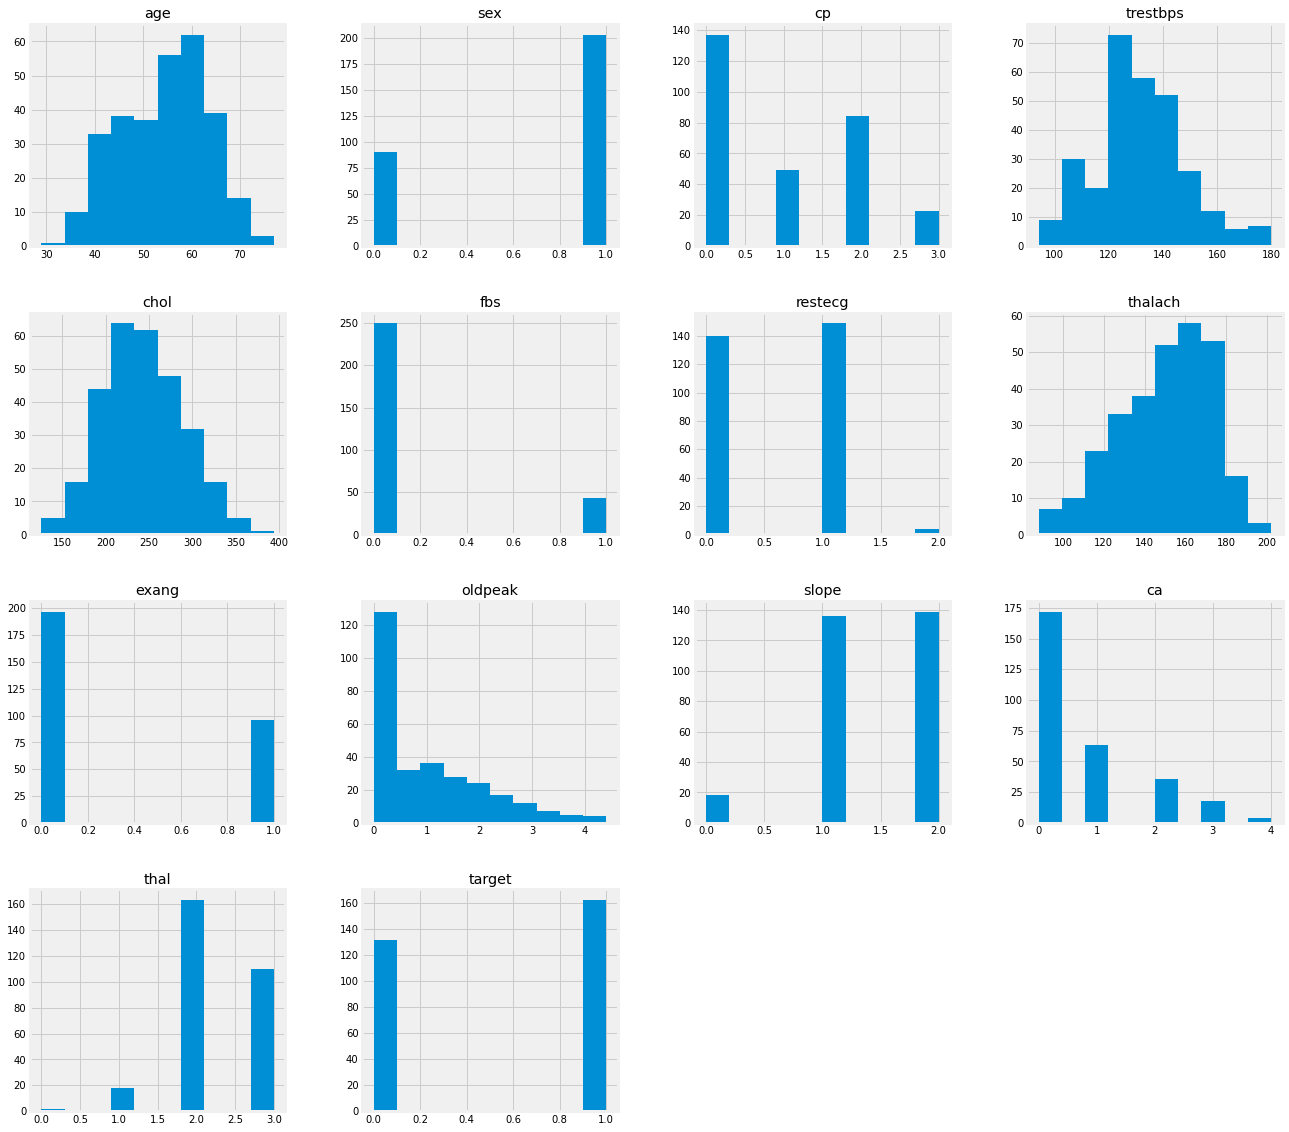

In [155]:
#Histogram plots for all columns in the new dataframe 'heart_df_new'
heart_df_new.hist(figsize=(20,20))
plt.show()

#### Predictors Correlation With The Target Variable

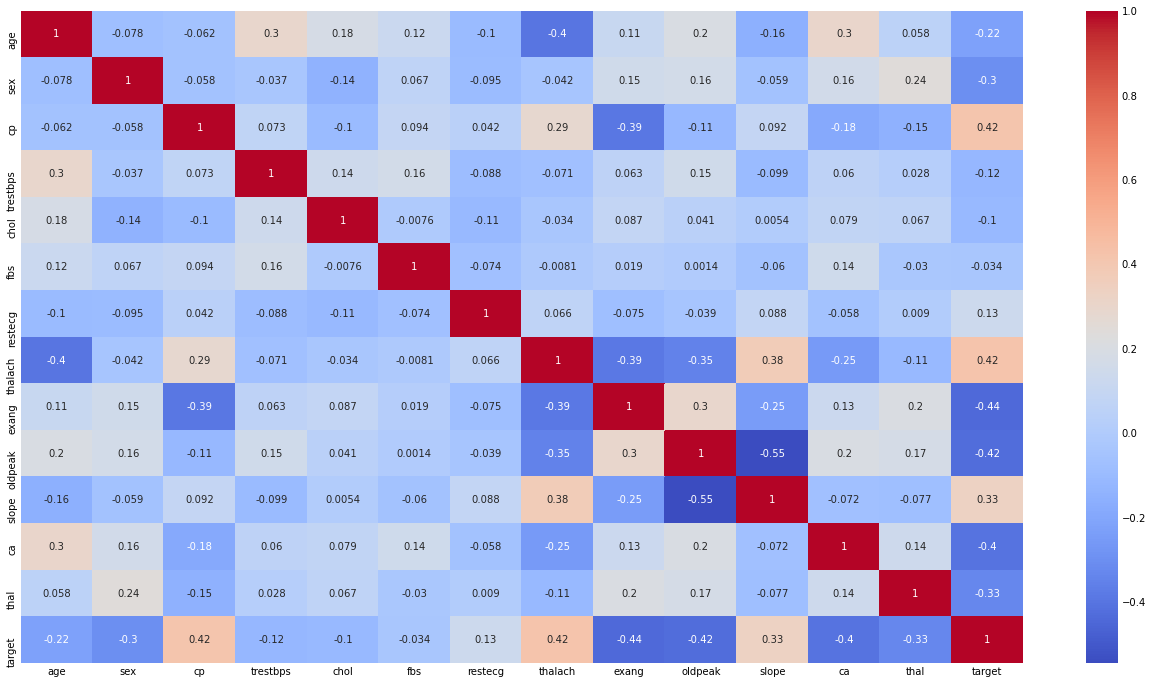

In [156]:
cor=heart_df_new.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

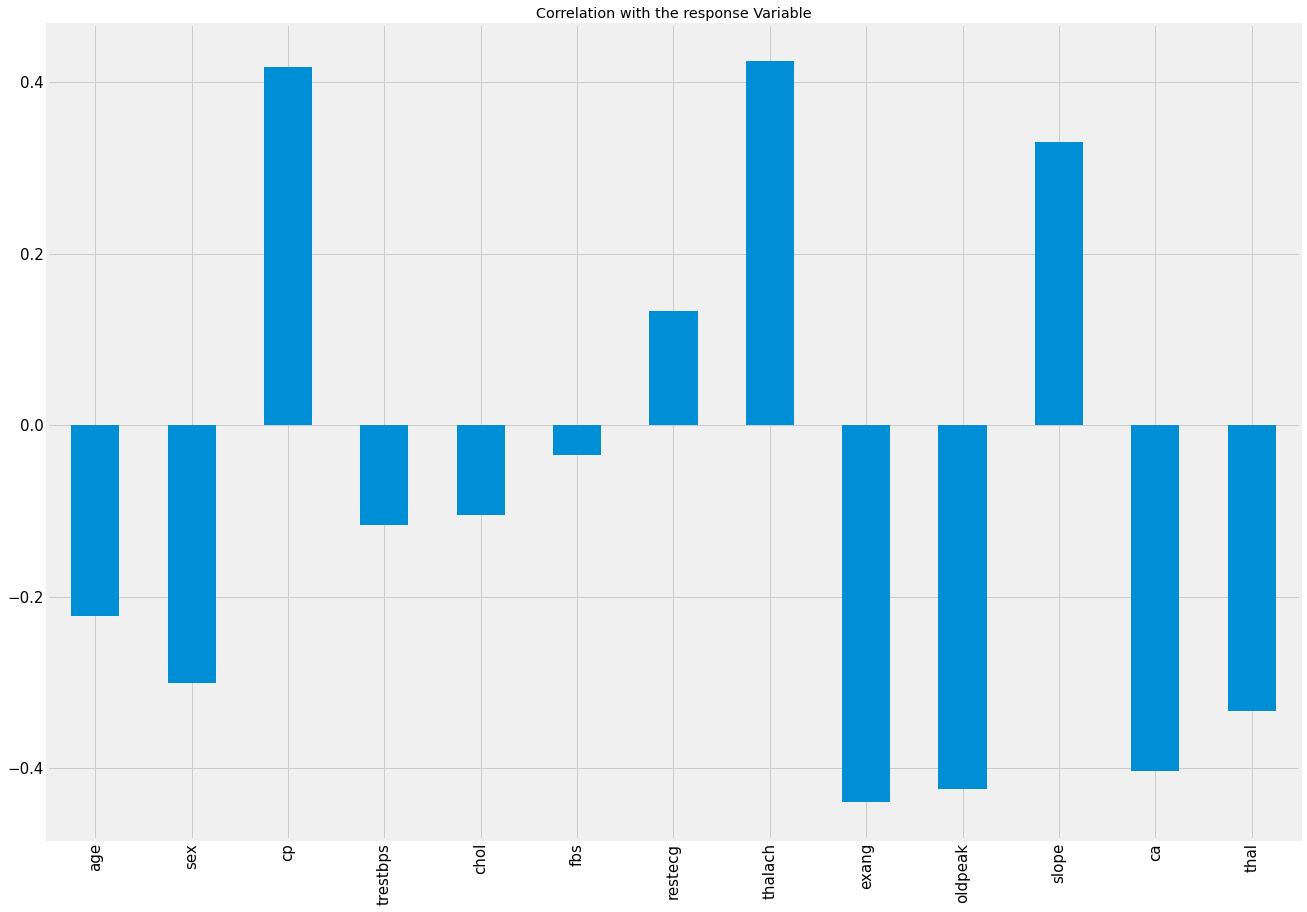

In [157]:
heart_df_new.drop('target', axis=1).corrwith(heart_df_new.target).plot.bar(figsize=(20,15), 
                                              title="Correlation with the response Variable", 
                                              fontsize=15, rot=90, grid=True)

'fbs' and 'chol' have the least correlation, while the other features have a significant correlation with the target variable.

In [239]:
#Total number of patients susceptible to heart attack 
heart_df_new.target.value_counts()

1    162
0    131
Name: target, dtype: int64

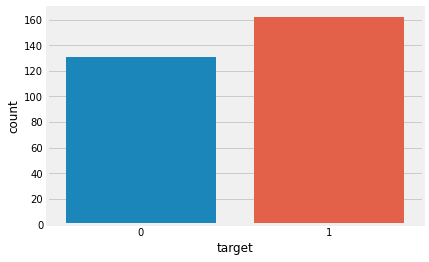

In [159]:
#Plot of value counts
sns.countplot(x='target',data=heart_df_new)

There are 131 patients with no heart attack, and 162 patients with a possibility of a heart attack.


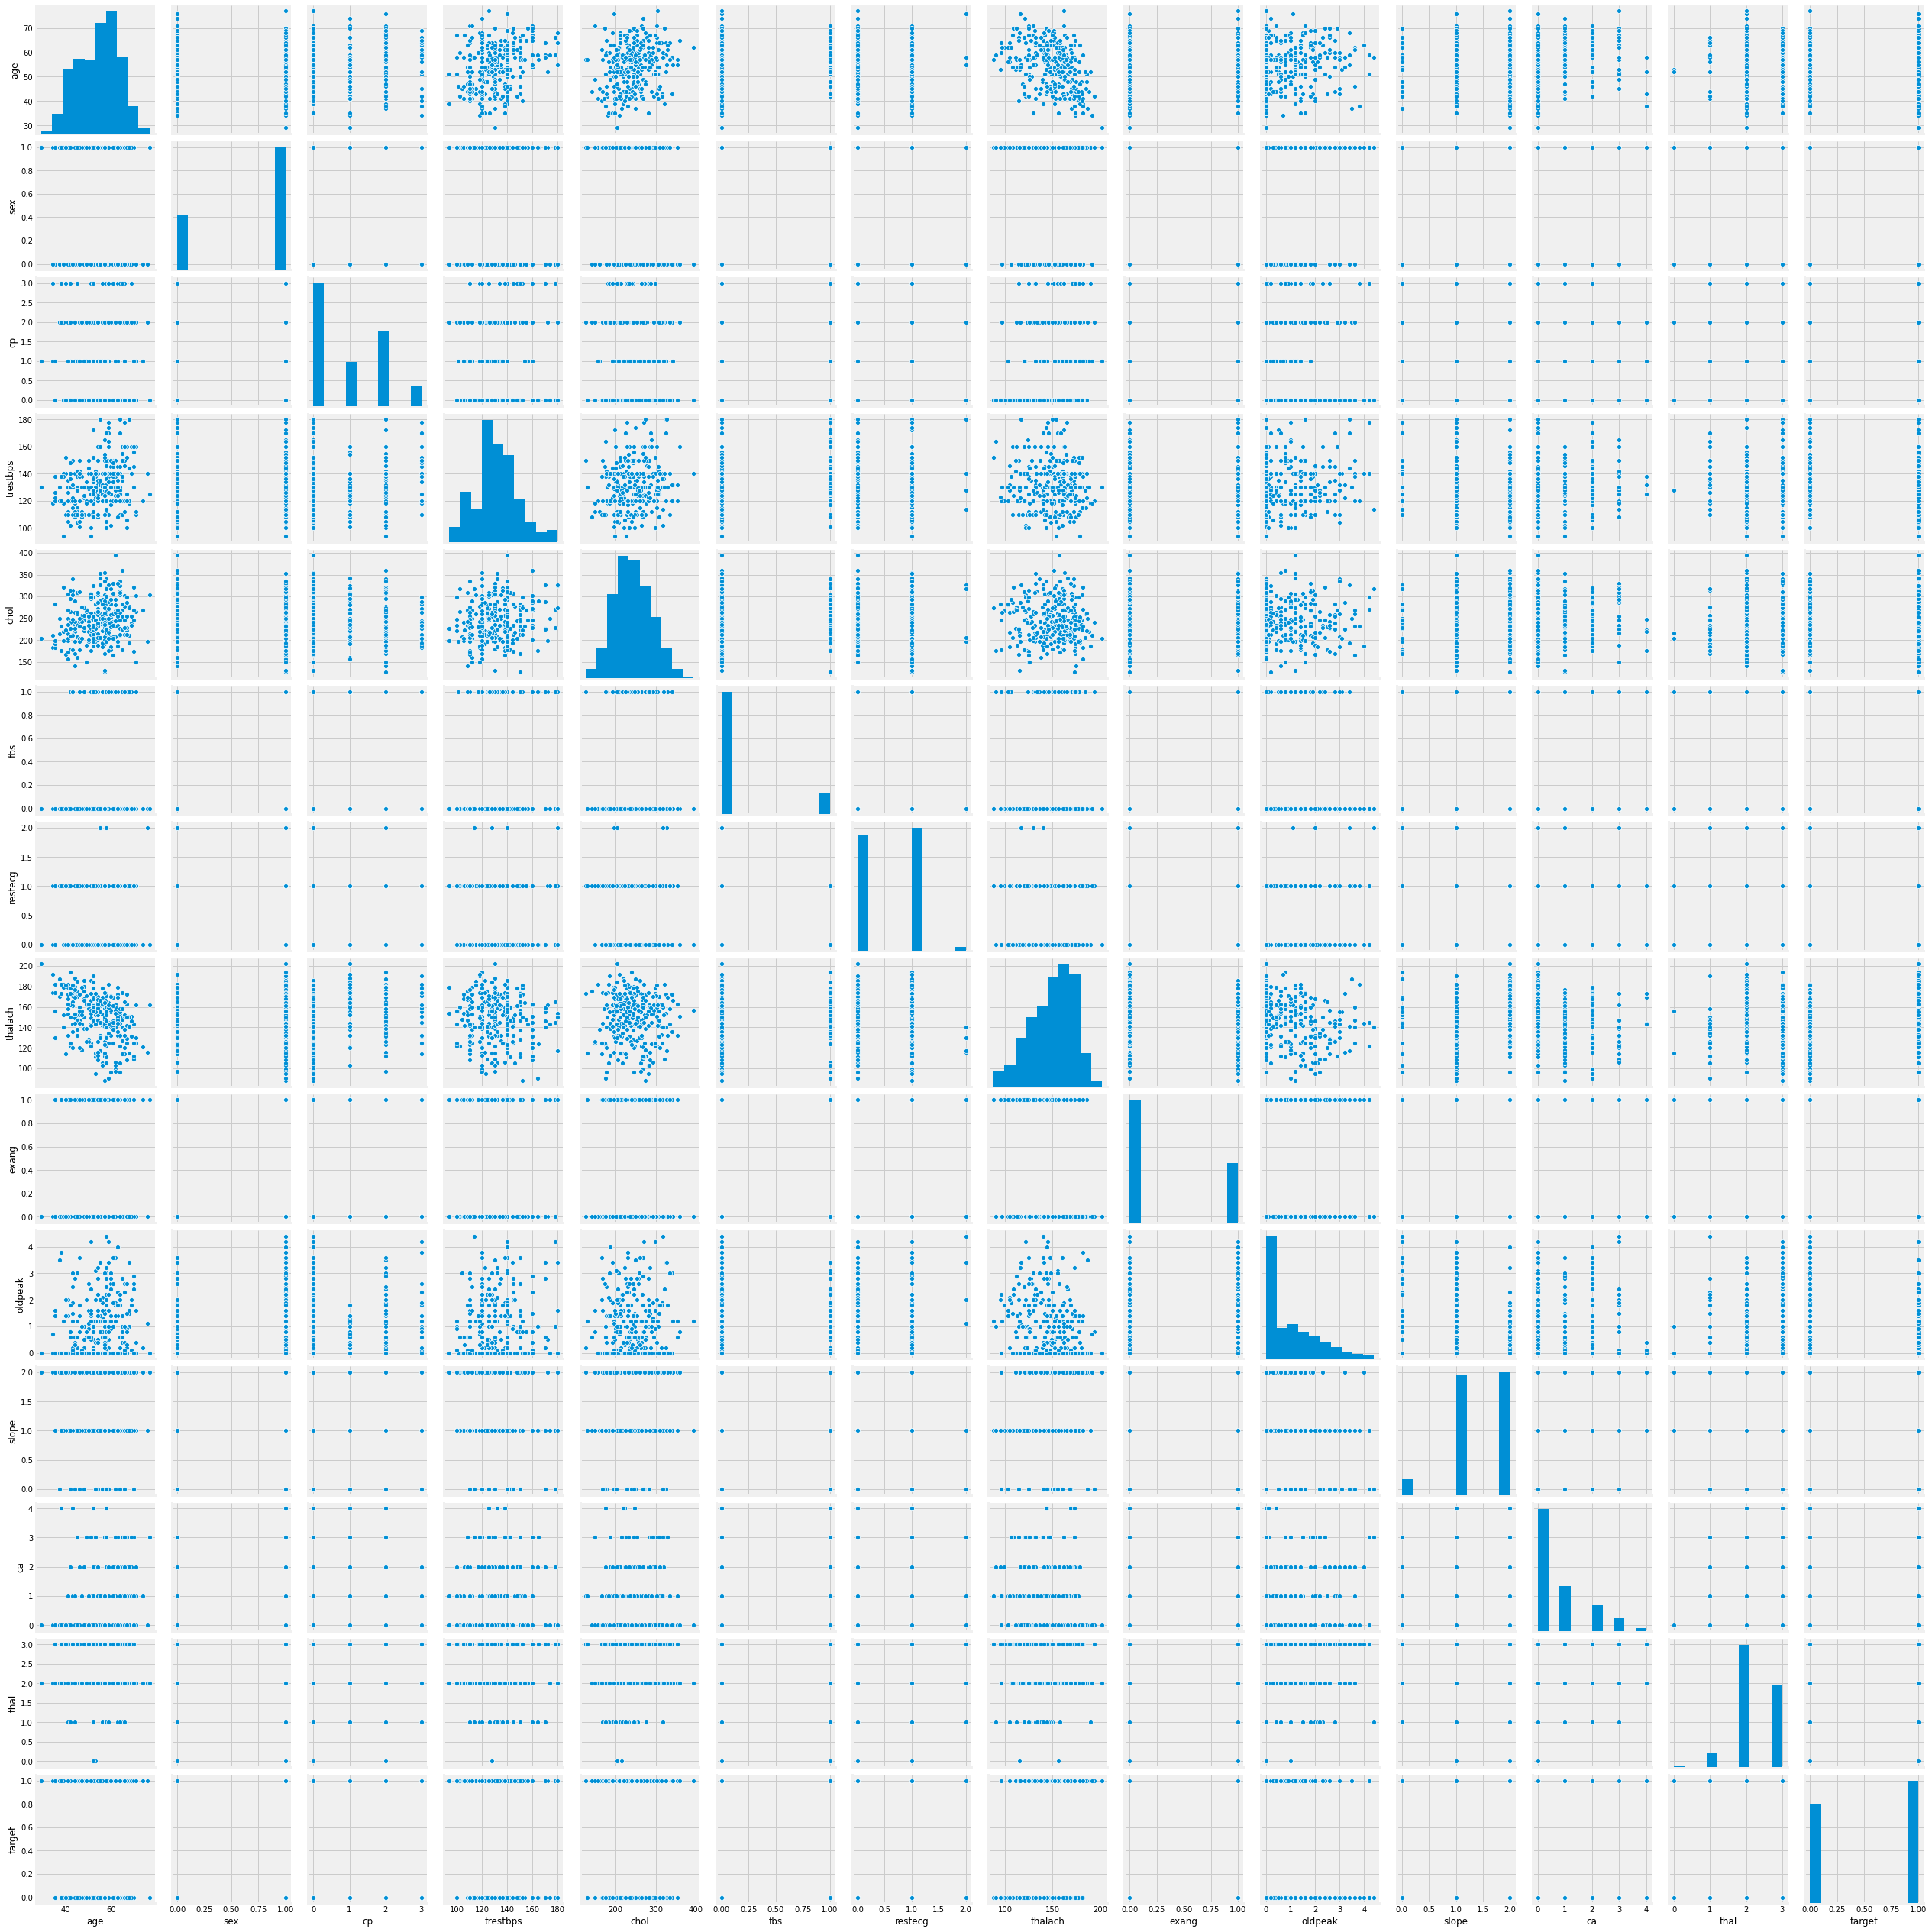

In [160]:
#Pairplot of all attributes considered for heart attack prediction in patients
sns.pairplot(data=heart_df_new)

#### Analysis of  the Individual Features

#### 1. Age

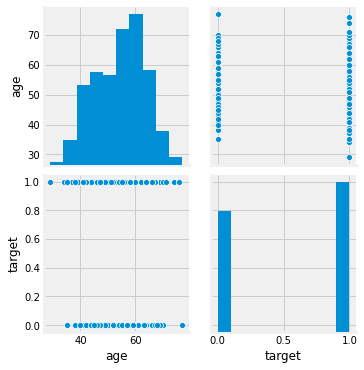

In [161]:
 sns.pairplot(data=heart_df_new, vars = ['age','target'])

In [162]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [163]:
col='age'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to age",'xaxis':{'title':"Age"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Patients between the ages of 40-65yrs are at a higher risk of experiencing the symptoms of heart attack

#### 2. Sex

In [164]:
df1=pd.DataFrame(heart_df_new.groupby('sex')['target'].mean().reset_index().values,
                    columns=["gender","target1"])
df1.head()

,gender,target1
0,0.0,0.777778
1,1.0,0.453202


Text(0.5, 1.0, 'Bar Chart for Sex Result')

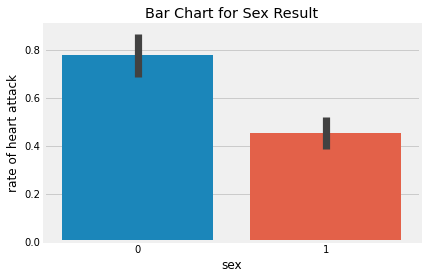

In [165]:
sns.barplot(heart_df_new.sex,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('Bar Chart for Sex Result')

The rate of heart attack in females is 75% and 45% in males

#### 3. Chest Pain (cp)

In [166]:
col = "cp"
grouped = heart_df_new[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': '0: typical angina, 1: atypical angina,2: non-anginal pain,3: asymptomatic'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


Text(0.5, 1.0, 'Bar Chart for Chest Pain Result')

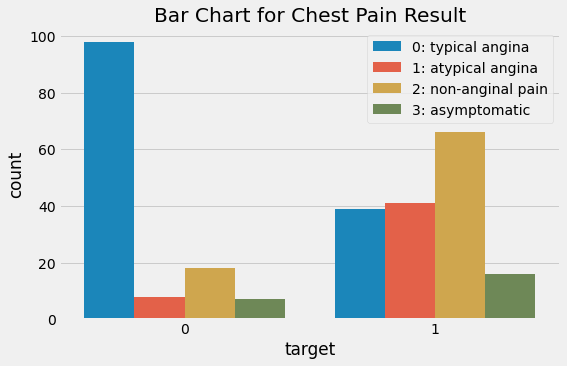

In [167]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.countplot(x=heart_df_new.target,hue=heart_df_new.cp)
plt.legend(labels=['0: typical angina', '1: atypical angina','2: non-anginal pain','3: asymptomatic'])
plt.title('Bar Chart for Chest Pain Result')

From the above plots, we observed that patients with chest pain type 1 and chest pain type 2 are more likely to experience a heart attack.

#### 4. Resting Blood Pressure (trestbps)


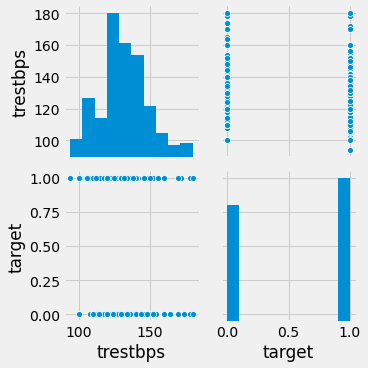

In [168]:
sns.pairplot(data=heart_df_new, vars = ['trestbps','target'])

In [169]:
col='trestbps'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to Resting Blood Pressure",'xaxis':{'title':"Resting Blood Pressure"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Patients with resting blood pressure between 120-150 have higher risk of suffering a heart attack.

#### 5. cholesterol measurement in mg/dl (chol)

In [170]:
col='chol'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to Cholesterol level",'xaxis':{'title':"Cholesterol Level"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Cholesterol level of 200-275 amongst patients poses a risk of possible heart attack.

#### 6. Fasting Blood Sugar (fbs)

In [171]:
col='fbs'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the person's fasting blood sugar ",'xaxis':{'title':"fbs(> 120 mg/dl, 1 = true; 0 = false)"}}
#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)

   fbs   target3
0  0.0  0.560000
1  1.0  0.511628


Text(0.5, 1.0, 'Bar Chart for Fasting Blood Sugar Result')

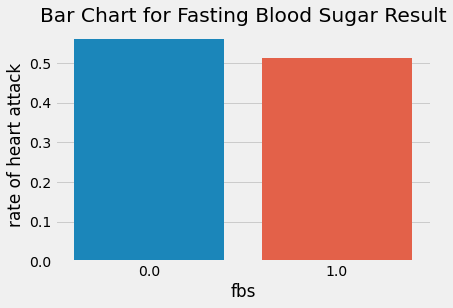

In [172]:
dy=pd.DataFrame(heart_df_new.groupby('fbs')['target'].mean().reset_index().values,
                    columns=["fbs","target3"])
print(dy.head())
sns.barplot(dy.fbs,dy.target3)
plt.ylabel('rate of heart attack')
plt.title('Bar Chart for Fasting Blood Sugar Result')

55% of patients with fasting blood sugar rate below 120 mg/dl are more susceptible to heart attack

#### 7. Resting electrocardiographic measurement (restecg)

In [173]:
col = "restecg"
grouped = heart_df_new[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': '0: normal, 1: having ST-T wave abnormality,2: showing probable or definite left ventricular hypertrophy by Estes criteria'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


Text(0.5, 1.0, 'Bar Chart for Resting Electrocardiographic Measurement Result')

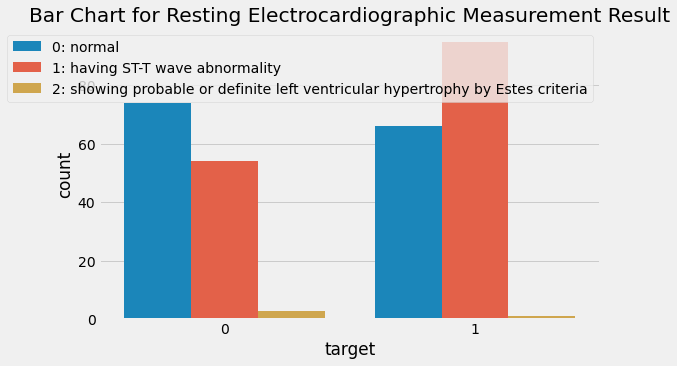

In [174]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.countplot(x=heart_df_new.target,hue=heart_df_new.restecg)
plt.legend(labels=['0: normal', '1: having ST-T wave abnormality', 
                   '2: showing probable or definite left ventricular hypertrophy by Estes criteria'])
plt.title('Bar Chart for Resting Electrocardiographic Measurement Result')


ST-T wave abnormality contributes to heart attack

#### 8. Maximum heart rate (thalach)

In [175]:
col='thalach'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to maximum heart rate",'xaxis':{'title':"Maximum heart rate"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Heart rate greater than 140 could be a strong indicator of a heart attack 

#### 9. Exercise Induced Angina (exang) 

In [176]:
df2=pd.DataFrame(heart_df_new.groupby('exang')['target'].mean().reset_index().values,
                    columns=["exercise","target2"])
df2.head()

,exercise,target2
0,0.0,0.705584
1,1.0,0.239583


Text(0.5, 1.0, '0=No, 1=Yes')

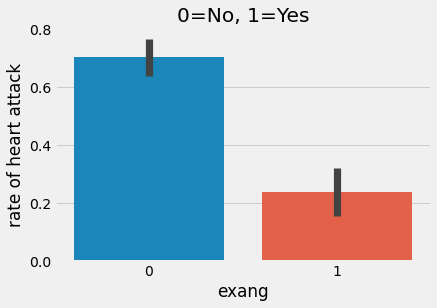

In [177]:
sns.barplot(heart_df_new.exang,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('0=No, 1=Yes')

#### 10. Exercise induced depression (oldpeak)

In [178]:
df3=pd.DataFrame(heart_df_new.groupby('oldpeak')['target'].mean().reset_index().values,
                    columns=["oldpeak","target3"])
df3.head()

,oldpeak,target3
0,0.0,0.752577
1,0.1,0.571429
2,0.2,0.750000
3,0.3,0.666667
4,0.4,0.888889


In [179]:
col='oldpeak'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to exercise induced depression",'xaxis':{'title':"Exercise induced depression"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

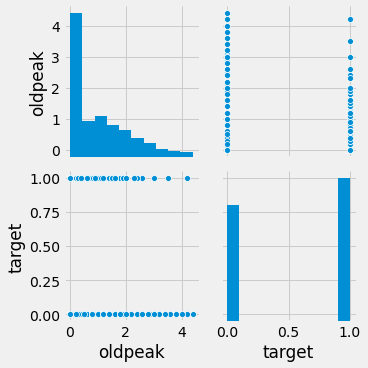

In [180]:
sns.pairplot(data=heart_df_new, vars = ['oldpeak','target'])

Exercise induced depression has a strong negative relationship with the target variable. From the plot, we see that a very low or no exercise induced depression increases the risk of patients having a heart attack

#### 11. The slope of the peak exercise ST segment (slope)

In [181]:
df4=pd.DataFrame(heart_df_new.groupby('slope')['target'].mean().reset_index().values,
                    columns=["slope","target4"])
df4.head()

,slope,target4
0,0.0,0.500000
1,1.0,0.352941
2,2.0,0.755396


Text(0.5, 1.0, '0: upsloping, 1: flat, 2: downsloping')

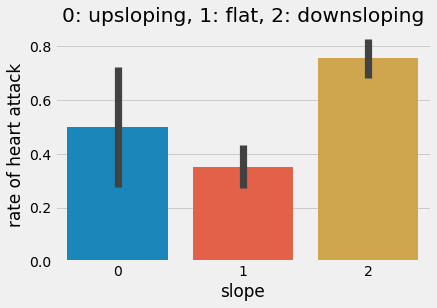

In [182]:
sns.barplot(heart_df_new.slope,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('0: upsloping, 1: flat, 2: downsloping')

Downsloping can trigger a heart attack

#### 12. The number of major vessels (ca)

In [183]:
categorical_cols = ['ca']

In [184]:
# Plotting Categorical Variable (Ca)

df['ca'] had 0-3 values according to the description "ca" in the dataset, but on checking for unique values, it had 0-4 values

In [185]:
#categorical feature-'ca'
y=heart_df_new['ca']
y.value_counts()

0    172
1     63
2     36
3     18
4      4
Name: ca, dtype: int64

We assumed that there was an error in the dataset, and made corrections by replacing all the values of 4, with 0 in the 'ca' rows

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Bar Chart for The Number of Major Vessels Colored by Flourosopy')

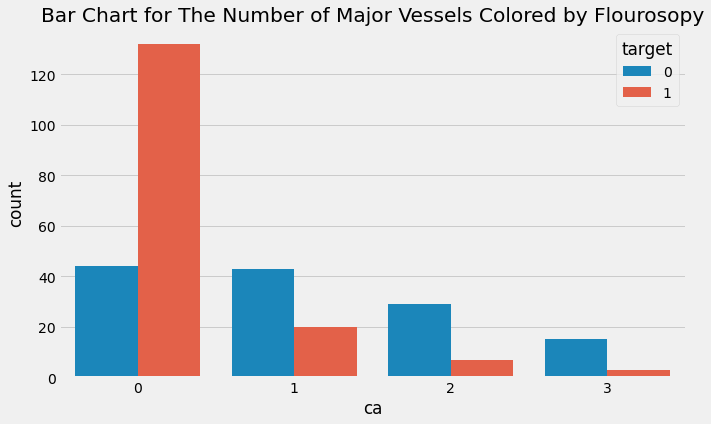

In [186]:
heart_df_new['ca'].loc[heart_df_new['ca'] == 4] = 0
plt.figure(figsize=(10,6))
sns.countplot(heart_df_new['ca'], hue ='target', data = heart_df_new)
plt.title('Bar Chart for The Number of Major Vessels Colored by Flourosopy')

In [187]:
cross_ca = pd.crosstab(heart_df_new['ca'],heart_df_new['target'])
print(cross_ca)

target   0    1
ca             
0       44  132
1       43   20
2       29    7
3       15    3


We can also see that the frequency of heart attack possibility depends a great deal on the number of vessels colored by flourosopy (ca). As shown in the plot above, patients with  ca equal to '0' are more likely to have a heart attack, and less obvious signs in ca '3'

#### 13. Thalassemia (thal)

df['thal'] had 3 values according to the description thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 

In [188]:
#categorical feature-'thal'
x=heart_df_new['thal']
x.value_counts()

2    163
3    110
1     18
0      2
Name: thal, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



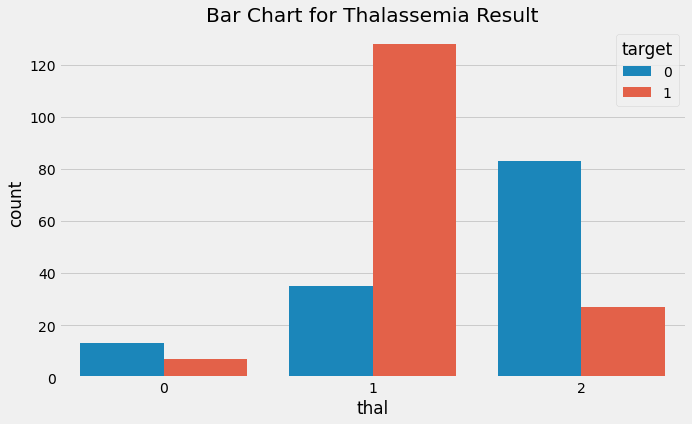

In [189]:
heart_df_new['thal'].loc[(heart_df_new['thal'] != 0) & (len(heart_df_new['thal'].unique()) == 4)] -=1
plt.figure(figsize=(10,6))
sns.countplot(heart_df_new['thal'], hue ='target', data = heart_df_new)
plt.title('Bar Chart for Thalassemia Result')
plt.savefig("thal.png") 

In [190]:
cross_thal = pd.crosstab(heart_df_new['thal'],heart_df_new['target'])
print(cross_thal)

target   0    1
thal           
0       13    7
1       35  128
2       83   27


Thalassemia is a good predictor of the outcome variable. The above plot shows that patients with 'thal' value equal to 1 (fixed defect) are more likely to have a heart attack. 

### D.  DATA MODELING

#### Perform Logistic Regression

In [191]:
# Fit the model
predictors = ['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'trestbps']
m = Logit(heart_df_new['target'], heart_df_new[predictors])
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.336154
         Iterations 7


In [192]:
# Results of regression parameters
m.params

age         0.022335
ca         -1.269465
chol       -0.004801
cp          0.791208
exang      -0.938930
fbs         0.258227
oldpeak    -0.403596
restecg     0.404731
sex        -1.683197
slope       0.774306
thal       -0.959617
thalach     0.028950
trestbps   -0.018630
dtype: float64

In [193]:
# Model summary
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.511     
Dependent Variable: target           AIC:              222.9864  
Date:               2021-01-13 00:13 BIC:              270.8286  
No. Observations:   293              Log-Likelihood:   -98.493   
Df Model:           12               LL-Null:          -201.45   
Df Residuals:       280              LLR p-value:      1.9601e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0223    0.0207   1.0813  0.2796  -0.0181   0.0628
ca            -1.2695    0.2713  -4.6783  0.0000  -1.8013  -0.7376
chol          -0.0048    0.0044  -1.0931  0.2744  -0.0134   0.0038
cp             0.7912    0.190

The summary above shows 13 attributes with p-values greater than 5% (significant level), thereby showing low
or no statistical significant relationship with the probability of a heart attack in patients. Here, backward elimination approach was adopted to remove features with p values greater than 5%. 

#### Feature Selection: Backward elemination (P-value approach)

In [194]:
# Remove variables with p-values > 5%
heart_df_new2=heart_df_new.drop(['fbs', 'restecg', 'oldpeak', 'age', 'trestbps', 'chol'], axis=1)
heart_df_new2.head()

,sex,cp,thalach,exang,slope,ca,thal,target
0,1,3,150,0,0,0,0,1
1,1,2,187,0,0,0,1,1
2,0,1,172,0,2,0,1,1
3,1,1,178,0,2,0,1,1
4,0,0,163,1,2,0,1,1


In [195]:
heart_df_new2.shape

(293, 8)

In [196]:
# Re-Fit the model
predictors2=['sex', 'cp', 'exang', 'ca', 'thal', 'thalach', 'slope'] 
m2=Logit(heart_df_new2['target'],heart_df_new2[predictors2])
m_new=m2.fit()

Optimization terminated successfully.
         Current function value: 0.359340
         Iterations 7


In [197]:
# New Model summary
print(m_new.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.477     
Dependent Variable: target           AIC:              224.5731  
Date:               2021-01-13 00:13 BIC:              250.3343  
No. Observations:   293              Log-Likelihood:   -105.29   
Df Model:           6                LL-Null:          -201.45   
Df Residuals:       286              LLR p-value:      8.1498e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
sex       -1.5892     0.4235   -3.7526   0.0002   -2.4192   -0.7592
cp         0.6954     0.1766    3.9369   0.0001    0.3492    1.0416
exang     -1.3122     0.3712   -3.5353   0.0004   -2.0397   -0.5847
ca        -1.3126     0.

We can see a strong association between each feature and the target variable. Simply put, these features can be used to predict the likelihood of a heart attack amongst patients.

In [198]:
# Results of regression parameters of the new model
m_new.params

sex       -1.589207
cp         0.695368
exang     -1.312182
ca        -1.312623
thal      -1.046865
thalach    0.011908
slope      1.067587
dtype: float64

In [199]:
heart_df_new2.shape

(293, 8)

In [200]:
# Estimates of the odds
heart_df_new2.loc[:, 'p'] = m_new.predict(heart_df_new2[predictors2])
heart_df_new2.head()

,sex,cp,thalach,exang,slope,ca,thal,target,p
0,1,3,150,0,0,0,0,1,0.907473
1,1,2,187,0,0,0,1,1,0.727414
2,0,1,172,0,2,0,1,1,0.978792
3,1,1,178,0,2,0,1,1,0.910044
4,0,0,163,1,2,0,1,1,0.847768


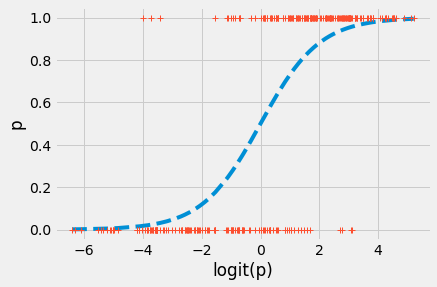

In [201]:
# Relationship between the values of logit(p) and odds (p) along the actual values of the response (target)
heart_df_new2 = heart_df_new2.sort_values(by = ['p'], axis = 0)
plt.plot(logit(heart_df_new2.p), heart_df_new2.p, '--')
plt.plot(logit(heart_df_new2.p), heart_df_new2.target, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

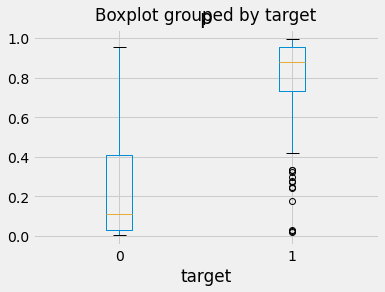

In [202]:
# Distribution of the estimated odds for both values of the actual response
heart_df_new2.boxplot(column='p', by = 'target')
plt.show()

In [203]:
# Binary estimates  𝑦̂   of the response  𝑦 
heart_df_new2.loc[:, 'yhat'] = (heart_df_new2.p > 0.5) * 1
heart_df_new2.yhat.value_counts()

1    178
0    115
Name: yhat, dtype: int64

#### Evaluation of the Logistic Regression Model

Next, we shall evaluate the logistic regression model using the pseudo r-squared, statistical accuracy, MCC, precision, recall, specificity, f-score, confusion matrix, Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)

##### Model Evaluation- Confusion Matrix

In [240]:
#The performance of our classification model can be visualized using a confusion matrix
pd.crosstab(heart_df_new2.target, heart_df_new2.yhat)

yhat,0,1
target,,
0,108,23
1,22,140


In [205]:
conf_mat = m_new.pred_table()
print (conf_mat)

[[101.  30.]
 [ 14. 148.]]


From the above;

#The confusion matrix shows 101+148=249 correct predictions, and 14+30=44 incorrect predictions

#True Positives: 148

#True Negatives: 101

#False Positives: 30 (Type 1 error)

#False Negatives: 14 (Type 2 error)

##### Model Evaluation- Statistics

In [206]:
# Extract the TP, FP, FN and TP
tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

101.0 30.0 14.0 148.0


In [207]:
# Calculate the accuracy, MCC, etc
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model is: %1.2f" % acc)

Accuraccy of the model is: 0.85


In [208]:
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

Mathews correlation coefficient between the estimates and the true response is: 0.70


In [209]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Model's precision is 0.83 and it's recall is 0.91


In [210]:
f_score = 2*((prc*rec)/(prc + rec))
print ("Model's f-score is: %1.2f" % f_score)

Model's f-score is: 0.87


In [211]:
specificity = tn/(tn+fp) #True Negative Rate
print ("Model's specificity is: %1.2f" % specificity)

Model's specificity is: 0.77


In [212]:
sensitivity = tp/(tp+fn) #True Positive Rate
print ("Model's sensitivity is: %1.2f" % sensitivity)

Model's sensitivity is: 0.91


The results of the statistical analysis shows that the model is more sensitive than specific (i.e. positive cases are predicted more accurately than the negatives). A higher sensitivity model was more desirable to us, as missing cases of actual risk of a heart attack (False Negatives) could lead to delays in treatment that negatively affect outcomes, which is dangerous.

##### Model Evaluation- ROC and AUROC at pre-specified discrimination threshold of 0.5

In [213]:
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning:

invalid value encountered in double_scalars



In [214]:
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

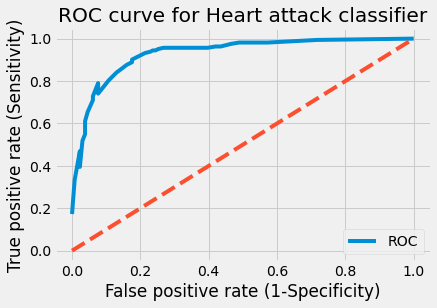

In [215]:
# ROC curve

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)
plt.title('ROC curve for Heart attack classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

To Calculate The AUC

In [216]:
# We integrated the sensitivity as a function of 1 - specificity

auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.93


AUC of 93% quantifies a great model classification accuracy

In [217]:
# We identify the threshold corresponding to the balanced sensitivity and specificity as well as the threshold corresponding 
#to the balanced specificity and sensitivity

# Where threshold equal 0.5
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Ballanced spec and sens
idx_ballance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

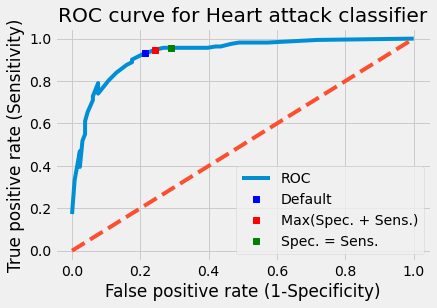

In [218]:
# Highlighted the point corresponding to the selected thresholds within the ROC curve

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.title('ROC curve for Heart attack classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.show()


Take a look at the confusion matrix at different points of the ROC curve.

In [219]:
m_new.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[ 97.,  34.],
       [ 12., 150.]])

Our classifier made a total of 293 predictions. Of the 293, 163 patients were predicted to be susceptible to heart attack, and less likely for the remaining 130 patients . However the true values are 162 and 131 respectively. Using the metric we calculated, it is quite obvious that the performance of this model is reliable. 

In [220]:
m_new.pred_table(threshold=roc.discret_thr[idx_ballance])

array([[ 90.,  41.],
       [ 10., 152.]])

Finally, we calculated the Youden's J

In [221]:
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.73


### Conclusion

From the analysis, common heart attack predictors include: sex, chest pain, exercise-induced angina (exang), the number of major vessels (ca), thalassemia (thal), maximum heart rate (thalach) and the slope of the peak exercise ST segment (slope). 

The model is highly sensitive and predicted with 87% accuracy, which makes this model quite reliable. The Area under the ROC curve is 93%.


### References

Data source: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

Czepiel, S.A. (1999). Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation Retrieved Dec 11, 2018 from czep.net/stat.

Multicollinearity, n.d. Retrieved Dec 11, 2018 from Wikipedia. https://en.wikipedia.org/wiki/Multicollinearity

Roccurves.png (2006). Retrieved Dec 11, 2018 from Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Roccurves.png Creative Commons Attribution-Share Alike 3.0 Unported.

Roc Curve Youden J.png (2014). Retrieved Dec 11, 2018 from Wikimedia commons. https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png Creative Commons Attribution-Share Alike 4.0 International.

Rodríguez, G. (2007). Lecture Notes on Generalized Linear Models. Chapter 3: Logit Models for Binary Data http://data.princeton.edu/wws509/notes/

Weisstein, E. W. (2018). Maximum Likelihood. MathWorld-A Wolfram Web Resource. Retrieved Dec 11, 2018 form http://mathworld.wolfram.com/MaximumLikelihood.html

Daniel Ananey-Obiri and Enoch Sarku (2020). Predicting the Presence of Heart Diseases using Comparative Data Mining and Machine Learning Algorithms. International Journal of Computer Applications (0975 – 8887). Volume 176 – No. 11